# Lab 5. Logistic regression

#### Table of contents

1. Overview
2. Type of glass
3. Prepare the data
4. Logistic regression & prediction
5. Non-linear hypothesis

## 1. Overview

During this lab we will code functions to perform logistic regression and predict the type of glass based on its composition.

## 2. Type of glass

The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence, if it is correctly identified. We will use the dataset provided on [kagge](https://www.kaggle.com/uciml/glass) which provide a variety of glass type and their corresponding composition.

## 3. Prepare the data

Let first load the data.

In [1]:
import pandas as pd
g0 = pd.read_csv('glass.csv')
g0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [2]:
g0.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


__Q.1.__ Create the Dataframe `g1` containing all examples of glass of type 1 based on `g0`. Update the values of the type of glass of `g1` to type 0 (1 mark).

In [3]:
### BEGIN SOLUTION
### END SOLUTION

__Q.2.__ Similarly, create the Dataframe `g2` containing all examples of glass of type 6 based on `g0`. Update the values of the type of glass of `g2` to type 1 (1 mark).

In [4]:
### BEGIN SOLUTION
### END SOLUTION

We can visualize the data with matplotlib. Based on the information reported on the website kaggle, glass of type 1 are windows glass whereas glass of type 6 are tableware. We will plot the concentration of Si as a function of the concentration of Mg for all examples in `g1` and `g2`.

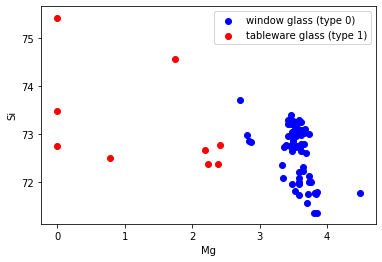

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(g1['Mg'],g1['Si'],c='b',label='window glass (type 0)')
plt.scatter(g2['Mg'],g2['Si'],c='r',label='tableware glass (type 1)')
plt.xlabel('Mg')
plt.ylabel('Si')
plt.legend()
plt.show()

The dataset should be linearly separable and we will use logistic regression with gradient descent to develop a model that predict the type of glass as a function of the concentration in Si and Mg of the sample.

## 4. Logistic regression & prediction

In logistic regression, the hypothesis is written as:

$h_\Theta = \frac{1}{1+e^{-\Theta X}}$

with the value of $\Theta X$ for a given example _i_ written as,

$\Theta X = \sum_{j=0}^{n}\theta_jx_j^{(i)}$

with $x_0 = 1$. The hypothesis function returns the probability of a given example being of type 1.

Let's first prepare the arrays _X_ and _y_ containing the input feature and the glass type (set to be 0 or 1), respectively.

In [6]:
import numpy as np

X1 = g1[['Mg','Si']]
X2 = g2[['Mg','Si']]
X = pd.concat([X1, X2])
X = np.c_[np.ones(X.to_numpy().shape[0]), X.to_numpy()]

Y1 = g1[['Type']]
Y2 = g2[['Type']]
y = pd.concat([Y1, Y2])
y = y.values.ravel()

print(X.shape,y.shape)

(79, 3) (79,)


__Q.3.__ Complete the function below corresponding to the hypothesis for logistic regression. This function takes as arguments the list of parameters $\Theta = [\theta_0,\theta_1,\dots,\theta_n]$ and the design matrix `X`, and must return the list of hypothesis evaluated over each training example. The function must be general and work with any size (m,n) of the design matrix (1 marks).

In [7]:
def hypothesis(ts,X):
    m,n = X.shape
    h = [] # initialize the hypothesis list
    ### BEGIN SOLUTION
    ### END SOLUTION
    return h

As introduced in the lecture, the cost function for logistic regression takes the form:

$J(\Theta) = -\frac{1}{m}\left[\sum_{i=1}^my^{(i)}\log{(h_\Theta(x^{(i)}))+(1-y^{(i)})\log{(1-h_\Theta(x^{(i)}))}}\right]$

__Q.4.__ Complete the cost function below that takes as arguments the hypothesis list evaluated over all traning examples, the design matrix and the corresponding array of target values _y_. The function should return a scalar (2 marks).

In [8]:
def cost_function(h,X,y):
    m,n = X.shape
    Jcost = 0 # initialize the cost to 0
    ### BEGIN SOLUTION
    ### END SOLUTION
    return Jcost

As usual we will use gradient descent to minimize the cost function. To improve convergence of gradient descent, we will scale the input features. We provide below the function to standardize the design matrix and apply it to the dataset.

In [9]:
def standard_multi(X):
    m,n = X.shape
    X_std = np.ones(X.shape)
    mu,std = [1],[1] 
    for i in range(1,n):
        mui = np.mean(X[:,i])
        stdi = np.std(X[:,i])
        mu.append(mui)
        std.append(stdi)
        for j in range(m): # loop over rows
            X_std[j][i] = (X[j][i]-mui)/stdi
    return X_std, mu, std

X_std,mux,stdx = standard_multi(X)

Note that we will only standardize the input features and it is important to keep the target values _y_ as binary (0 or 1) to satisfy the cost function.

The update rule to minimize the cost function with gradient descent is:

$\theta_n\rightarrow \theta_n-\alpha \frac{1}{m}\sum_{i=1}^m\left(h(x^{(i)})-y^{(i)}\right)x_n^{(i)}$

with $\alpha$ the learning rate. This is similar expression than for linear regression with multiple variables, we therefore provide the functions below.

In [10]:
def update_ts(ts,alpha,h,X,y):
    m,n = X.shape     
    grads = []
    for i in range(n):
        gradi = 0.0
        for j in range(m):
            gradi += (1.0/m)*(h[j]-y[j])*X[j][i]
        grads.append(gradi)
    
    for i in range(n):
        ts[i] = ts[i]-alpha*grads[i]
    return ts

In [11]:
def gd(X,y,Niter,alpha):
    ts = [0]*X.shape[1]
    Jlist = []
    for step in range(1,Niter):
        h = hypothesis(ts,X)
        ts = update_ts(ts,alpha,h,X,y)
        h = hypothesis(ts,X)
        Jcost = cost_function(h,X,y)
        Jlist.append(Jcost)
        if step % int(Niter/10) == 0: print(step,ts,Jcost)
    print("Final values of the coefficients ts and cost:", ts,Jcost)
    return ts,Jlist

ts,Jlist = gd(X_std,y,1000,0.1)

100 [-1.6626952230359457, -1.2392440410677343, 0.11389081468522981] 0.16257061939022002
200 [-2.15425085574748, -1.7895639664171143, 0.04855468805045876] 0.10621238165928686
300 [-2.4222695045870886, -2.1857935557553754, -0.01926403984766227] 0.08269261271482906
400 [-2.6070959904569504, -2.500157412997037, -0.08451841536595721] 0.06892396203044764
500 [-2.7515863421850173, -2.760191443304678, -0.14605191464316816] 0.059679511397902535
600 [-2.8728883325524945, -2.9811109959090154, -0.20356831999841424] 0.05298940879290376
700 [-2.9790703533501293, -3.172670277683422, -0.25715319852843255] 0.047901652986952675
800 [-3.0744322950951526, -3.341549339450865, -0.3070572637245854] 0.0438892633372407
900 [-3.1615169511237378, -3.4924986555781836, -0.3535883808313498] 0.04063474005201433
Final values of the coefficients ts and cost: [-3.2411889856892078, -3.627687373653139, -0.39663974493770926] 0.037959740512587145


We can plot the cost as a function of iterations along the gradient descent optimization to appreciate convergence.

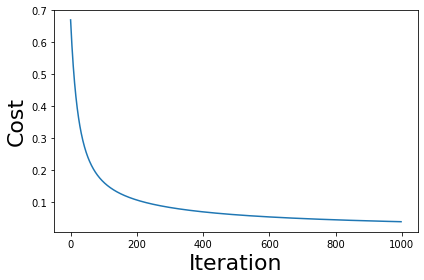

In [12]:
plt.plot(Jlist)
plt.xlabel("Iteration",fontsize=22)
plt.ylabel("Cost",fontsize=22)
plt.tight_layout()
plt.show()

We now recover the parameters for the actual data and plot the data and the decision boundary.

b0,b1,b2: 36.232782621374426 -2.8949334957354407 -0.39663974493770926


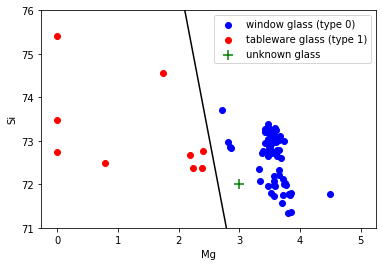

In [13]:
b2 = ts[2]
b1 = ts[1]*stdx[2]/stdx[1]
b0 = -mux[1]*ts[1]*stdx[2]/stdx[1]+ts[0]*stdx[2]-mux[2]*ts[2]
print("b0,b1,b2:",b0,b1,b2)

plt.scatter(g1['Mg'],g1['Si'],c='b',label='window glass (type 0)')
plt.scatter(g2['Mg'],g2['Si'],c='r',label='tableware glass (type 1)')
plt.scatter(3,72,c='g',marker='+',s=100,label='unknown glass')
plt.xlabel('Mg')
plt.ylabel('Si')

x_vals = np.linspace(0,5,100)
y_vals = -(x_vals*b1+b0)/b2
plt.plot(x_vals, y_vals, '-', c="k")

plt.ylim(71,76)
plt.legend()
plt.show()

Let's predict the type of an unknown glass with the following concentrations [x1,x2] = [[Mg],[Si]] = [3,72].

__Q.5.__ Complete the code block below to assign the variable _p_ the probability of the unknown glass to be of type 0, based on the model we just optimized (2 marks).

In [14]:
x = np.array([[1,3,72]])
### BEGIN SOLUTION
### END SOLUTION
print('The probability of the unknown glass to be of type 0 is:',round(p,2))

The probability of the unknown glass to be of type 0 is: 0.73


## 5. Non-linear hypothesis

We will start by adding some additional data to the training set.

In [15]:
X_ = X.copy()
X_ = np.append(X_,np.array([[ 1,2.3,73.5]]),axis=0)
X_ = np.append(X_,np.array([[ 1,3.0,74]]),axis=0)
X_ = np.append(X_,np.array([[ 1,3.0,72]]),axis=0)
y_ = y.copy()
y_ = np.append(y_,0)
y_ = np.append(y_,1)
y_ = np.append(y_,1)

Let's visualize the data.

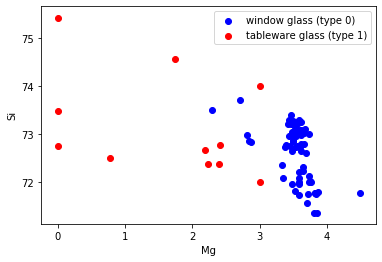

In [16]:
fig, axes = plt.subplots();
axes.set_xlabel('Mg')
axes.set_ylabel('Si')
b_list = np.array(list(map(bool,y_)))
axes.scatter(X_[:,1][~b_list],X_[:,2][~b_list],c='b',label='window glass (type 0)')
axes.scatter(X_[:,1][b_list],X_[:,2][b_list],c='r',label='tableware glass (type 1)')
axes.legend()
plt.show()

We standardize the new dataset, perform logistic regression, unscale the regression coefficients, and we visualize the dataset together with the decision boudary.

In [17]:
X_std_,mux_,stdx_ = standard_multi(X_)
ts_,Jlist_ = gd(X_std_,y_,1000,0.1)
b2_ = ts_[2]
b1_ = ts_[1]*stdx_[2]/stdx_[1]
b0_ = -mux_[1]*ts_[1]*stdx_[2]/stdx_[1]+ts_[0]*stdx_[2]-mux_[2]*ts_[2]
print("b0,b1,b2:",b0_,b1_,b2_)

100 [-1.559391196040647, -1.2224314087996648, 0.12541322132436744] 0.20486302028458922
200 [-1.9896150701576751, -1.7532682795079004, 0.06254217337738176] 0.1563461066617444
300 [-2.2073489799831068, -2.123724878642848, -0.003341497232048784] 0.1372727627809369
400 [-2.3483022127859106, -2.4078756419316067, -0.0658774215486097] 0.12677484451445
500 [-2.4527354575707014, -2.635156935089443, -0.1234605742117142] 0.12016925940714135
600 [-2.536333013108455, -2.8219798312937283, -0.17573321693523858] 0.11569857763455886
700 [-2.6063643628275357, -2.978756941749463, -0.22288856124732848] 0.11252351105852454
800 [-2.6666917201131546, -3.1125169317845787, -0.2653449629305681] 0.11018768238188521
900 [-2.7196106979485033, -3.2281955438220136, -0.30358659887432865] 0.10842177772823733
Final values of the coefficients ts and cost: [-2.766170501734079, -3.3284169605577376, -0.3377620440602682] 0.10706938267589225
b0,b1,b2: 31.652715953869425 -2.734597468907146 -0.3377620440602682


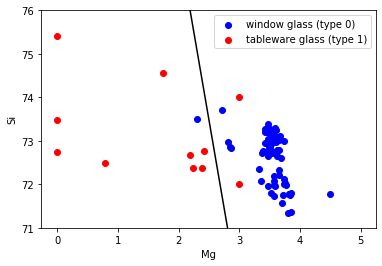

In [18]:
plt.scatter(X_[:,1][~b_list],X_[:,2][~b_list],c='b',label='window glass (type 0)')
plt.scatter(X_[:,1][b_list],X_[:,2][b_list],c='r',label='tableware glass (type 1)')
plt.xlabel('Mg')
plt.ylabel('Si')

x_vals = np.linspace(0,5,100)
y_vals = -(x_vals*b1_+b0_)/b2_
plt.plot(x_vals, y_vals, '-', c="k")

plt.ylim(71,76)
plt.legend()
plt.show()

This new dataset is not linearly separable. Let's evaluate the performance of the model we just optimized.

__Q.6.__ Complete the function below to compute the confusion matrix. The function takes in the hypothesis array evaluated at each training example, the design matrix, and the actual target data. The function should return a 2D array with elements as defined in the lecture (2 marks).

In [19]:
def confusion_matrix(h,X,y):
    m,n = X.shape
    tn,fp,fn,tp = 0,0,0,0
    # BEGIN SOLUTION
    # END SOLUTION
    return np.array([[tn,fp],[fn,tp]])

h = hypothesis([b0_,b1_,b2_],X_)
print(confusion_matrix(h,X_,y_))

[[70  1]
 [ 2  9]]


We would like now to propose non-linear transformation to imrpove the model performance. We note that this might not be a physically sounded approach based on the actual dataset but we will do it to understand better the non-linear approach. We provide below a function to expand features to a given degree of polynomial and a function to plot the decision boundary based on contours. Don't worry too much if you do not understand all the details of these functions, it is more important you understand wht they output following the example below.

In [20]:
def poly_features(X1, X2, degree):
    X_poly = np.ones(X1.shape[0])
    for i in range(1,degree+1):
        for j in range(0,i+1):
            X_poly = np.column_stack((X_poly,(X1**(i-j))*(X2**j)))
    return X_poly

def plot_db(theta,degree,X, axes):
    u = np.linspace(min(X[:,1]),max(X[:,1]), 50)
    v = np.linspace(min(X[:,2]),max(X[:,2]), 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = poly_features(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")

We first standardize the design matrix, then we expand the features to polynomial of degree 2. We show the first few rows of the standardized, expanded design matrix. The polynomial expansion transforms the features [1,$x_1$,$x_2$] to [1,$x_1$,$x_2$,$x_1^2$,$x_1x_2$,$x_2^2$].

In [27]:
X_std,mux,stdx = standard_multi(X_)
degree = 2
X_std = poly_features(X_std[:,1], X_std[:,2], degree)
X_std[:5]

array([[ 1.00000000e+00,  1.47781948e+00, -1.36975392e+00,
         2.18395041e+00, -2.02424902e+00,  1.87622579e+00],
       [ 1.00000000e+00,  3.93451234e-01,  3.90634864e-02,
         1.54803874e-01,  1.53695769e-02,  1.52595597e-03],
       [ 1.00000000e+00,  3.32531670e-01,  4.24634565e-01,
         1.10577312e-01,  1.41204441e-01,  1.80314514e-01],
       [ 1.00000000e+00,  5.03106450e-01, -1.38892396e-01,
         2.53116100e-01, -6.98776603e-02,  1.92910977e-02],
       [ 1.00000000e+00,  4.17819060e-01,  5.58101477e-01,
         1.74572767e-01,  2.33185434e-01,  3.11477259e-01]])

We can now perform logistic regression based on the expanded features.

In [28]:
ts,Jlist = gd(X_std,y_,5000,0.1)

500 [-2.7115788034625417, -2.208620540926696, -0.10663059526306107, 0.7021424862977632, 0.480655461594218, 0.27116309222539337] 0.10891475208905611
1000 [-3.271780027401862, -2.858895072893438, -0.26798132183293344, 0.725341094850906, 1.22239969347135, 0.757986099556079] 0.0774213911846613
1500 [-3.6398251613269004, -3.3064194423526545, -0.34520662221734794, 0.7187958018852275, 1.8257496176646437, 1.0997410694809908] 0.06087373210480926
2000 [-3.932777499029266, -3.6626831019933515, -0.39536609727553884, 0.7382680678789041, 2.2992772998387796, 1.3569372318610928] 0.050710862302811834
2500 [-4.191565511165212, -3.9563136760809585, -0.4385189059053251, 0.7933754414205922, 2.6694040968547785, 1.5600853993908073] 0.0439609729628779
3000 [-4.427499793258066, -4.199550108205148, -0.4798442607325437, 0.871548400143395, 2.9715650919805987, 1.724655215359644] 0.03913057841428187
3500 [-4.640829699875698, -4.404228085747314, -0.5176613094905183, 0.9566976776876861, 3.2331990084238975, 1.86374770

We now unscale the optimized parameters and plot the data and decision boundary.

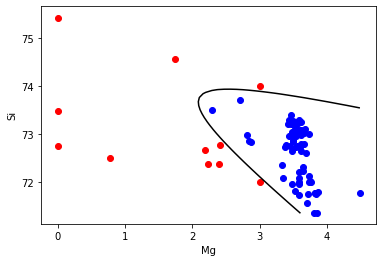

In [29]:
fig, axes = plt.subplots();
axes.set_xlabel('Mg')
axes.set_ylabel('Si')

plt.scatter(X_[:,1][~b_list],X_[:,2][~b_list],c='b',label='window glass (type 0)')
plt.scatter(X_[:,1][b_list],X_[:,2][b_list],c='r',label='tableware glass (type 1)')

t0,t1,t2,t3,t4,t5 = ts[0],ts[1],ts[2],ts[3],ts[4],ts[5]
mu1,mu2,std1,std2 = mux[1],mux[2],stdx[1],stdx[2]

b0 = t0-mu1*t1/std1-mu2*t2/std2+mu1*mu1*t3/std1/std1+mu2*mu2*t5/std2/std2+mu1*mu2*t4/std1/std2
b1 = t1/std1-2*mu1*t3/std1/std1-mu2*t4/std1/std2
b2 = t2/std2-2*mu2*t5/std2/std2-mu1*t4/std1/std2
b3 = t3/std1/std1
b4 = t4/std1/std2
b5 = t5/std2/std2

#print(b0,b1,b2,b3,b4,b5)

plot_db(np.array([b0,b1,b2,b3,b4,b5]),degree,X_, axes)

__Q.7.__ What value of the f1 score the non-linear model gives? Assign to the variable f1 the value of f1 score you expect to obtain based on the non-linear model (1 mark).

In [ ]:
# BEGIN SOLUTION
# END SOLUTION